In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# allows to output plots in the notebook
%matplotlib inline 

# makes inline plots to have better quality
%config InlineBackend.figure_format = 'svg'

# Set the default style
plt.style.use("ggplot") 

### Cleaning the data

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Id,Policy,Premium,Start,End,Birthday,CityType,City,Purpose,KM,HP,CarType,Year,Claim
0,100338,SF 025823,"41,000.00",1/1/2013,12/31/2013,5/20/1982,City,YR,OWN,100000,150,CAR,2003,0
1,103451,SF 028541,"8,250.00",1/1/2013,4/1/2013,1/5/1938,City,YR,OWN,230000,71,CAR,1989,0
2,104694,SF 041780,"41,000.00",1/1/2013,12/31/2013,5/9/1946,City,YR,OWN,80000,150,CAR,2007,0
3,105350,SF 035609,"32,000.00",1/1/2013,12/31/2013,3/6/1961,Village,AM,OWN,43533,100,CAR,1989,0
4,104232,SF 029066,"8,250.00",1/1/2013,3/31/2013,3/11/1982,City,YR,OWN,130000,80,CAR,2004,0


In [3]:
data = data[-(data.Birthday == '1/1/1900')]
data = data[-(data.Birthday == '1/0/1900')]

In [4]:
data = data.dropna()

In [5]:
print(data.CityType.value_counts())
print("====================")
print(data.City.value_counts())
print("====================")
print(data.Purpose.value_counts())
print("====================")
print(data.CarType.value_counts())

City       161782
Village     55346
Name: CityType, dtype: int64
YR    88281
LR    35799
AR    16388
KT    14135
SH    13161
AG    10613
TV     9929
AM     8369
GE     7692
SY     7463
VD     5131
NL      167
Name: City, dtype: int64
OWN    185705
OTH     23069
TAX      4424
SRV      1885
PBL      1117
COM       928
Name: Purpose, dtype: int64
CAR    191193
TRC     23499
BUS      1478
OTH       680
MCL       278
Name: CarType, dtype: int64


In [6]:
data['Birthday'] = pd.to_datetime(data.Birthday,format = '%m/%d/%Y')
data['Start'] = pd.to_datetime(data.Start,format = '%m/%d/%Y')
data['End'] = pd.to_datetime(data.End,format = '%m/%d/%Y')

data.head()

,Id,Policy,Premium,Start,End,Birthday,CityType,City,Purpose,KM,HP,CarType,Year,Claim
0,100338,SF 025823,"41,000.00",2013-01-01,2013-12-31,1982-05-20,City,YR,OWN,100000,150,CAR,2003,0
1,103451,SF 028541,"8,250.00",2013-01-01,2013-04-01,1938-01-05,City,YR,OWN,230000,71,CAR,1989,0
2,104694,SF 041780,"41,000.00",2013-01-01,2013-12-31,1946-05-09,City,YR,OWN,80000,150,CAR,2007,0
3,105350,SF 035609,"32,000.00",2013-01-01,2013-12-31,1961-03-06,Village,AM,OWN,43533,100,CAR,1989,0
4,104232,SF 029066,"8,250.00",2013-01-01,2013-03-31,1982-03-11,City,YR,OWN,130000,80,CAR,2004,0


In [7]:
print('Policy Start range is '+ str(data.Start.min()) + ' - ' + str(data.Start.max()))
print('Policy End range is '+ str(data.End.min()) + ' - ' + str(data.End.max()))
print('Birthday range is '+ str(data.Birthday.min()) + ' - ' + str(data.Birthday.max()))

Policy Start range is 2013-01-01 00:00:00 - 2016-08-20 00:00:00
Policy End range is 2013-01-11 00:00:00 - 2016-08-30 00:00:00
Birthday range is 1900-02-12 00:00:00 - 2013-08-18 00:00:00


In [8]:
data['Age'] = np.floor((data.Start.dt.year-data.Birthday.dt.year))

In [9]:
data = data[np.logical_and(data.Age >= 18,data.Age <= 85)]

count    216875.000000
mean     169309.996016
std      139600.905209
min           1.000000
25%       95000.000000
50%      150000.000000
75%      210000.000000
max      999999.000000
Name: KM, dtype: float64


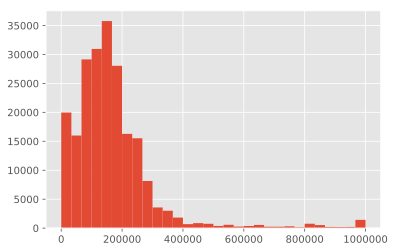

In [10]:
pd.to_numeric(data.KM, errors='coerce').hist(bins=30)
print(data.KM.describe())

In [11]:
data = data[np.logical_and(data.KM >= 1000,data.KM <= 600000)]

count    211197.000000
mean        121.307069
std          65.825967
min          -1.000000
25%          77.000000
50%         100.000000
75%         140.000000
max        1420.000000
Name: HP, dtype: float64


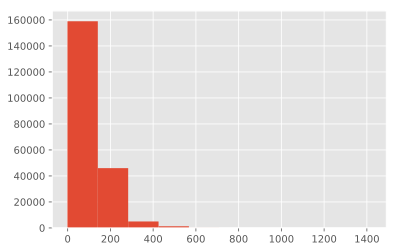

In [12]:
pd.to_numeric(data.HP, errors='coerce').hist(bins=10)
print(data.HP.describe())

In [13]:
data = data[np.logical_and(data.HP >= 50,data.HP <= 400)]

In [14]:
data['CarAge'] = np.floor((data.Start.dt.year-data.Year))

In [15]:
data['Duration'] = (data.End-data.Start).astype('timedelta64[D]')+1

count    208634.000000
mean        203.873784
std         142.374192
min          10.000000
25%          92.000000
50%         182.000000
75%         366.000000
max         367.000000
Name: Duration, dtype: float64


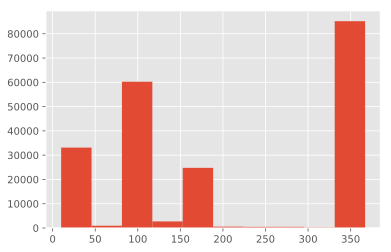

In [16]:
pd.to_numeric(data.Duration, errors='coerce').hist(bins=10)
print(data.Duration.describe())

In [17]:
data = data[data.Duration >= 364]
data = data[data.Claim <= 1800000]

In [18]:
data['Urban'] = data.CityType.map(dict(City=1, Village=0))

In [19]:
object_filter = np.array(['City','Purpose','CarType',])

data1 = pd.get_dummies(data,columns=object_filter)

### Splitting the data

In [20]:
# training set consists of the observations started before Jan 2015 
indices = np.logical_and(data1.Start.dt.year == 2015,data1.Start.dt.month >= 1)

train = data1[-indices]

test = data1[indices]

In [21]:
cols = np.array(['Age','CarAge','HP','KM','Urban','City_AG','City_AM', 'City_AR', 'City_GE', 'City_KT', 'City_LR', 'City_NL',
       'City_SH', 'City_SY', 'City_TV', 'City_VD', 'City_YR', 'Purpose_COM',
       'Purpose_OTH', 'Purpose_OWN', 'Purpose_PBL', 'Purpose_SRV',
       'Purpose_TAX', 'CarType_BUS', 'CarType_CAR', 'CarType_MCL',
       'CarType_OTH', 'CarType_TRC','Claim'])
train = train[cols]
test = test[cols]

In [22]:
print(str(np.sum(train.Claim > 0)/len(train)*100)+'% of the policies had claims in Train set')
print(str(np.sum(test.Claim > 0)/len(test)*100)+'% of the policies had claims in Test set')

7.349727218273948% of the policies had claims in Train set
6.160526202656808% of the policies had claims in Test set


count    4.540000e+03
mean     2.001380e+05
std      2.766735e+05
min      5.000000e+03
25%      6.000000e+04
50%      1.050000e+05
75%      2.000000e+05
max      1.800000e+06
Name: Claim, dtype: float64


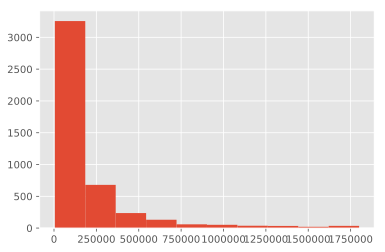

In [23]:
pd.to_numeric(train.Claim[train.Claim > 0], errors='coerce').hist(bins=10)
print(train.Claim[train.Claim > 0].describe())

count    1.433000e+03
mean     1.961965e+05
std      2.546974e+05
min      3.000000e+03
25%      6.000000e+04
50%      1.100000e+05
75%      2.000000e+05
max      1.800000e+06
Name: Claim, dtype: float64


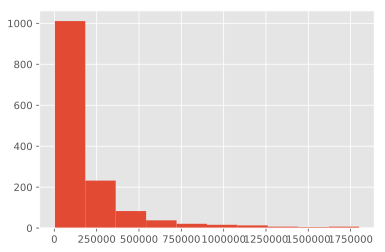

In [24]:
pd.to_numeric(test.Claim[test.Claim > 0], errors='coerce').hist(bins=10)
print(test.Claim[test.Claim > 0].describe())

### Train - Test split

In [25]:
X_train = train.drop(columns = 'Claim')
X_test = test.drop(columns = 'Claim')
y_train = train['Claim']
y_test = test['Claim']
n_train = len(train)
n_test = len(test)
n_all = len(data1)

In [26]:
print('Training set: ' + str(np.sum(y_train == 0)) + ' : ' + str(np.sum(y_train > 0))) 
print('Test set: ' + str(np.sum(y_test == 0)) + ' : ' + str(np.sum(y_test > 0))) 

Training set: 57231 : 4540
Test set: 21828 : 1433


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_all = pd.concat([X_train, X_test])
data_all[data_all.columns] = scaler.fit_transform(data_all[data_all.columns])
X_train = data_all.iloc[0:n_train,:]
X_test = data_all.iloc[n_train:n_all,:]

# y part
y_data_all = pd.concat([y_train, y_test])
y_max = y_data_all.max()
y_min = y_data_all.min()
y_data_all = (y_data_all-y_min)/(y_max-y_min)
y_train = y_data_all[0:n_train]
y_test = y_data_all[n_train:n_all]

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Regression Task

In [28]:
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [30]:
def get_best_alpha(model,X,y,alphas):
    kf = KFold(n_splits=5, random_state = 0, shuffle=False)
    results = []
    for alpha in alphas:
        model.set_params(n_estimators = alpha)
        for train_indexes, test_indexes in kf.split(X):
            X_test, X_val = X.values[train_indexes], X.values[test_indexes]
            y_test, y_val = y.values[train_indexes], y.values[test_indexes]

            model.fit(X_test, y_test)
            mse = mean_squared_error(y_val,model.predict(X_val))
            results.append((alpha, mse))
   

    best_alpha, mse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, mse

In [31]:
#alphas = np.arange(97,105,1)

#print(get_best_alpha(RandomForestRegressor(), X_train, y_train, alphas))

In [32]:
model = RandomForestRegressor(n_estimators=102).fit(X_train, y_train)


In [33]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10)

,importance
KM,0.296941
HP,0.216327
Age,0.192354
CarAge,0.179019
Urban,0.018540
City_AR,0.009264
City_LR,0.008521
City_GE,0.006975
City_SY,0.006721
City_AG,0.006692


In [34]:
y_pred = model.predict(X_test)

In [35]:
RMSE = np.sqrt(np.mean((y_test-y_pred)**2))
print('The RMSE on Test set is ' + str(RMSE))

The RMSE on Test set is 0.04731726451813944


In [36]:
#rescaling
y_pred = y_pred*(y_max-y_min) + y_min
y_test = y_test*(y_max-y_min) + y_min 

#plt.hist(y_pred,bins=50)

In [37]:
print('Range: [' + str(np.min(y_pred)) + ' ; ' + str(np.max(y_pred)) + '] with average value of ' + str(np.mean(y_pred)) )

Range: [0.0 ; 996260.7843137255] with average value of 18354.458948170915


**RandomForestRegressor(n_estimators=102) is chosen to be the final model**

# Fairness Criterion per risk factor

In [38]:
print('======KM======')
KM_min = test.KM.min()
KM_max = test.KM.max()

KM_range = np.arange(KM_min,KM_max,70000)

n = len(KM_range)
LR_KM = np.zeros(n-1)

for i in range(n-1):
    ind =  np.logical_and(KM_range[i] <= test.KM,test.KM < KM_range[i+1])
    LR_KM[i] = np.sum(y_test[ind])/np.sum(y_pred[ind])
    print(str(KM_range[i])+' - '+str(KM_range[i+1])+' ----> '+str(LR_KM[i])+' with '+str(np.sum(ind))+' obs.')
print('Mean is '+str(np.mean(LR_KM)))
print('StDev is '+str(np.std(LR_KM)))



======KM======
1000 - 71000 ----> 0.6934272001207794 with 3447 obs.
71000 - 141000 ----> 0.6990423967879017 with 7337 obs.
141000 - 211000 ----> 0.6910329883997908 with 7300 obs.
211000 - 281000 ----> 0.5510939204915801 with 3504 obs.
281000 - 351000 ----> 0.5425198011859514 with 1111 obs.
351000 - 421000 ----> 0.3864312335855749 with 334 obs.
421000 - 491000 ----> 0.26773110858025995 with 117 obs.
491000 - 561000 ----> 2.091675277796364 with 81 obs.
Mean is 0.7403692408685253
StDev is 0.5310369571949979


In [39]:
print('======HP======')
HP_min = test.HP.min()
HP_max = test.HP.max()

HP_range = np.arange(HP_min,HP_max,40)

n = len(HP_range)
LR_HP = np.zeros(n-1)

for i in range(n-1):
    ind =  np.logical_and(HP_range[i] <= test.HP,test.HP < HP_range[i+1])
    LR_HP[i] = np.sum(y_test[ind])/np.sum(y_pred[ind])
    print(str(HP_range[i])+' - '+str(HP_range[i+1])+' ----> '+str(LR_HP[i])+' with '+str(np.sum(ind))+' obs.')
print('Mean is '+str(np.mean(LR_HP)))
print('StDev is '+str(np.std(LR_HP)))




======HP======
50 - 90 ----> 0.6510757463740371 with 10067 obs.
90 - 130 ----> 0.7780241766222006 with 6422 obs.
130 - 170 ----> 0.5680228591908559 with 3069 obs.
170 - 210 ----> 0.5679379137194909 with 1536 obs.
210 - 250 ----> 0.6172318053453717 with 1446 obs.
250 - 290 ----> 0.5197472305843399 with 410 obs.
290 - 330 ----> 0.623088443244853 with 174 obs.
330 - 370 ----> 0.10959348798610648 with 71 obs.
Mean is 0.554340207883407
StDev is 0.18283954258552357


In [40]:
print('======Age======')
Age_min = test.Age.min()
Age_max = test.Age.max()

Age_range = np.arange(Age_min,Age_max,10)

n = len(Age_range)
LR_Age = np.zeros(n-1)

for i in range(n-1):
    ind =  np.logical_and(Age_range[i] <= test.Age,test.Age < Age_range[i+1])
    LR_Age[i] = np.sum(y_test[ind])/np.sum(y_pred[ind])
    print(str(Age_range[i])+' - '+str(Age_range[i+1])+' ----> '+str(LR_Age[i])+' with '+str(np.sum(ind))+' obs.')
print('Mean is '+str(np.mean(LR_Age)))
print('StDev is '+str(np.std(LR_Age)))



======Age======
18.0 - 28.0 ----> 0.6512507411458847 with 1820 obs.
28.0 - 38.0 ----> 0.6635344123700883 with 5449 obs.
38.0 - 48.0 ----> 0.5938291715672357 with 4861 obs.
48.0 - 58.0 ----> 0.6867148574244212 with 5763 obs.
58.0 - 68.0 ----> 0.7408460257379345 with 3746 obs.
68.0 - 78.0 ----> 0.5871284179212211 with 1284 obs.
Mean is 0.6538839376944642
StDev is 0.052920087218867776


In [41]:
print('======CarAge======')
CarAge_min = test.CarAge.min()
CarAge_max = test.CarAge.max()

CarAge_range = np.arange(CarAge_min,CarAge_max,25)

n = len(CarAge_range)
LR_CarAge = np.zeros(n-1)

for i in range(n-1):
    ind =  np.logical_and(CarAge_range[i] <= test.CarAge,test.CarAge < CarAge_range[i+1])
    LR_CarAge[i] = np.sum(y_test[ind])/np.sum(y_pred[ind])
    print(str(CarAge_range[i])+' - '+str(CarAge_range[i+1])+' ----> '+str(LR_CarAge[i])+' with '+str(np.sum(ind))+' obs.')
print('Mean is '+str(np.mean(LR_CarAge)))
print('StDev is '+str(np.std(LR_CarAge)))

======CarAge======
0.0 - 25.0 ----> 0.6609836929916045 with 15762 obs.
25.0 - 50.0 ----> 0.6519439643352097 with 7430 obs.
50.0 - 75.0 ----> 0.4765722304741347 with 68 obs.
Mean is 0.5964999626003163
StDev is 0.084881976387775


In [42]:
print('======City======')
#possible values of City variable
City = data.City[indices].unique()

n = len(City)
LR_City = np.zeros(n)

for i in range(n):
    ind = data.City[indices] == City[i]
    LR_City[i] = np.sum(y_test[ind])/np.sum(y_pred[ind])
    print(City[i] + ' ----> ' + str(LR_City[i])+' with '+str(np.sum(ind))+' obs.')
print('Mean is '+str(np.mean(LR_City)))
print('StDev is '+str(np.std(LR_City)))


======City======
AG ----> 0.8347167910120944 with 1138 obs.
LR ----> 0.8952716838644444 with 4794 obs.
YR ----> 0.6494874494440752 with 5626 obs.
AM ----> 0.563897391274737 with 1016 obs.
AR ----> 0.6213870230609356 with 2747 obs.
KT ----> 0.41950554324151457 with 1590 obs.
VD ----> 0.3664442199973034 with 1158 obs.
GE ----> 0.6388686659553577 with 1076 obs.
SY ----> 0.678121098296684 with 977 obs.
SH ----> 0.6269406356752958 with 1683 obs.
TV ----> 0.7730786800077645 with 1456 obs.
Mean is 0.6425199256209279
StDev is 0.15136410737813447


In [43]:
print('======Purpose======')
#possible values of Purpose variable
Purpose = data.Purpose[indices].unique()

n = len(Purpose)
LR_Purpose = np.zeros(n)

for i in range(n):
    ind = data.Purpose[indices] == Purpose[i]
    LR_Purpose[i] = np.sum(y_test[ind])/np.sum(y_pred[ind])
    print(Purpose[i] + ' ----> ' + str(LR_Purpose[i])+' with '+str(np.sum(ind))+' obs.')
print('Mean is '+str(np.mean(LR_Purpose)))
print('StDev is '+str(np.std(LR_Purpose)))


======Purpose======
OWN ----> 0.6732641460479324 with 20081 obs.
OTH ----> 0.553746498606975 with 2683 obs.
SRV ----> 0.3674352796845067 with 123 obs.
PBL ----> 1.0651979844143444 with 87 obs.
COM ----> 0.4836320572497942 with 130 obs.
TAX ----> 0.7610287642350008 with 157 obs.
Mean is 0.6507174550397589
StDev is 0.22436604573128055


In [44]:
print('======CarType======')
#possible values of CarType variable
CarType = data.CarType[indices].unique()

n = len(CarType)
LR_CarType = np.zeros(n)

for i in range(n):
    ind = data.CarType[indices] == CarType[i]
    LR_CarType[i] = np.sum(y_test[ind])/np.sum(y_pred[ind])
    print(CarType[i] + ' ----> ' + str(LR_CarType[i])+' with '+str(np.sum(ind))+' obs.')
print('Mean is '+str(np.mean(LR_CarType)))
print('StDev is '+str(np.std(LR_CarType)))


======CarType======
CAR ----> 0.6749820703399488 with 20267 obs.
TRC ----> 0.532011403007755 with 2636 obs.
BUS ----> 0.4351332129678912 with 123 obs.
OTH ----> 1.1555037182436785 with 230 obs.
MCL ----> 0.0 with 5 obs.
Mean is 0.5595260809118547
StDev is 0.373582523148638


In [45]:
print('======Urban======')

LR_Urban = np.zeros(2)

ind = test.Urban == 1

LR_Urban[0] = np.sum(y_test[ind])/np.sum(y_pred[ind])
LR_Urban[1] = np.sum(y_test[-ind])/np.sum(y_pred[-ind])

print('Urban'+' ----> '+str(LR_Urban[0])+' with '+str(np.sum(ind))+' obs.')
print('Rural' + ' ----> '+str(LR_Urban[1])+' with '+str(np.sum(-ind))+' obs.')

print('Mean is '+str(np.mean(LR_Urban)))
print('StDev is '+str(np.std(LR_Urban)))



======Urban======
Urban ----> 0.6549054897311317 with 14874 obs.
Rural ----> 0.6671423972214741 with 8387 obs.
Mean is 0.6610239434763029
StDev is 0.006118453745171171


In [46]:
print('The overall loss ratio is ' + str(np.sum(y_test)/np.sum(y_pred)))
print('The Mean of loss ratios is ' + str(np.mean(np.concatenate([LR_Age,LR_KM,LR_HP,LR_CarAge,LR_Urban,LR_CarType,LR_Purpose,LR_City]))))
print('The StDev loss ratios is ' + str(np.std(np.concatenate([LR_Age,LR_KM,LR_HP,LR_CarAge,LR_Urban,LR_CarType,LR_Purpose,LR_City]))))


The overall loss ratio is 0.6585177322769307
The Mean of loss ratios is 0.6359628838278333
The StDev loss ratios is 0.28547026334145087
